In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"devenvaru","key":"4d207c823726e15bc0ec8461e0339ebd"}'}

In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("alessandrasala79/ai-vs-human-generated-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ai-vs-human-generated-dataset
Dataset files: ['test_data_v2', 'train.csv', 'test.csv', 'train_data']


In [ ]:
df_train = pd.read_csv(os.path.join(path, "train.csv"))
df_test  = pd.read_csv(os.path.join(path, "test.csv"))

In [ ]:
df_train.head()

,Unnamed: 0,file_name,label
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1


In [ ]:
df_test.head()

,id
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg


In [ ]:
print("Training Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79950 entries, 0 to 79949
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  79950 non-null  int64 
 1   file_name   79950 non-null  object
 2   label       79950 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ MB

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5540 non-null   object
dtypes: object(1)
memory usage: 43.4+ KB


In [ ]:
print("Number of training samples:", len(df_train))
print("Number of test samples:", len(df_test))

Number of training samples: 79950
Number of test samples: 5540


In [ ]:
label_counts = df_train['label'].value_counts()
print("Label distribution in training data:")
print(label_counts)

Label distribution in training data:
label
1    39975
0    39975
Name: count, dtype: int64


<ipython-input-18-15d2199e0e5a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='label', palette='viridis')


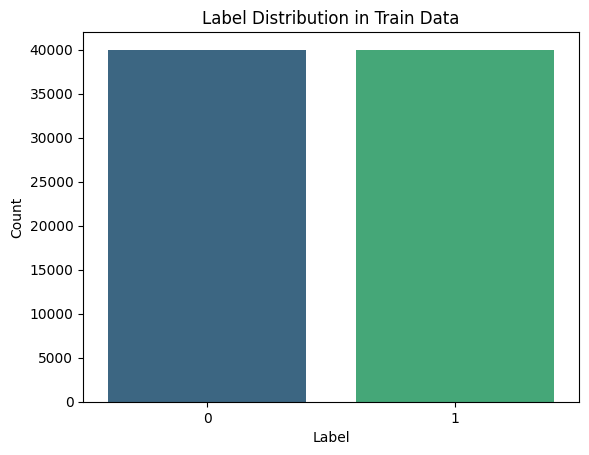

In [ ]:
sns.countplot(data=df_train, x='label', palette='viridis')
plt.title("Label Distribution in Train Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

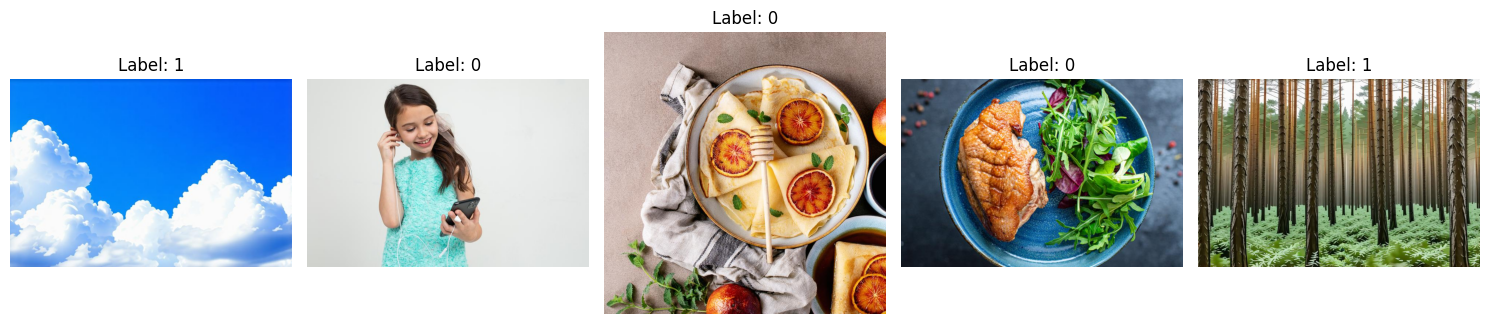

In [ ]:
sample_df = df_train.sample(5, random_state=42)

plt.figure(figsize=(15, 5))

for i, row in enumerate(sample_df.itertuples(), start=1):
    file_path = os.path.join(path, row.file_name)

    img = Image.open(file_path)
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Label: {row.label}")

plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image
import numpy as np

widths = []
heights = []
ratios = []  # width / height

for idx, row in df_train.iterrows():
    img_path = row['file_name']
    file_path = os.path.join(path, row.file_name)


    try:
        with Image.open(file_path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
            ratios.append(w/h if h != 0 else 0)
    except Exception as e:
        print(f"Error opening image {file_path}: {e}")
        widths.append(None)
        heights.append(None)
        ratios.append(None)

# Create new columns in df_train
df_train['width'] = widths
df_train['height'] = heights
df_train['aspect_ratio'] = ratios

# Quick statistics on width, height, and aspect ratio
print("Image Width Stats:")
print(df_train['width'].describe())

print("\nImage Height Stats:")
print(df_train['height'].describe())

print("\nAspect Ratio Stats:")
print(df_train['aspect_ratio'].describe())


Image Width Stats:
count    79950.000000
mean       716.566654
std        101.020008
min        320.000000
25%        768.000000
50%        768.000000
75%        768.000000
max        768.000000
Name: width, dtype: float64

Image Height Stats:
count    79950.000000
mean       569.553171
std        118.955900
min        112.000000
25%        512.000000
50%        512.000000
75%        640.000000
max        768.000000
Name: height, dtype: float64

Aspect Ratio Stats:
count    79950.000000
mean         1.340008
std          0.407346
min          0.416667
25%          1.200000
50%          1.500000
75%          1.500000
max          6.857143
Name: aspect_ratio, dtype: float64


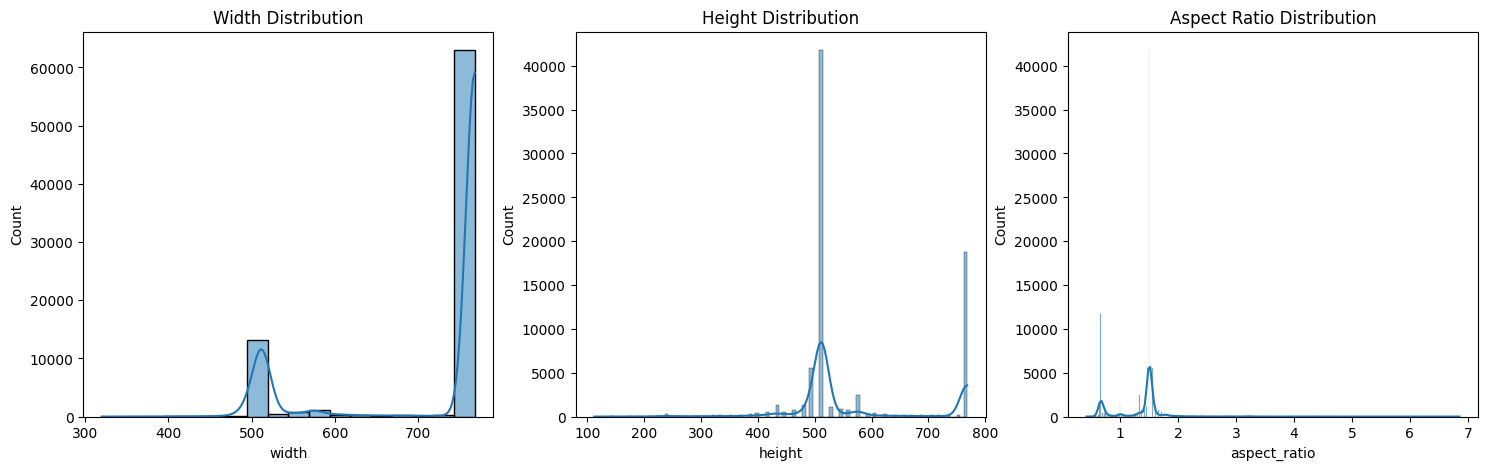

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data=df_train, x='width', kde=True, ax=axes[0])
axes[0].set_title("Width Distribution")

sns.histplot(data=df_train, x='height', kde=True, ax=axes[1])
axes[1].set_title("Height Distribution")

sns.histplot(data=df_train, x='aspect_ratio', kde=True, ax=axes[2])
axes[2].set_title("Aspect Ratio Distribution")
plt.show()


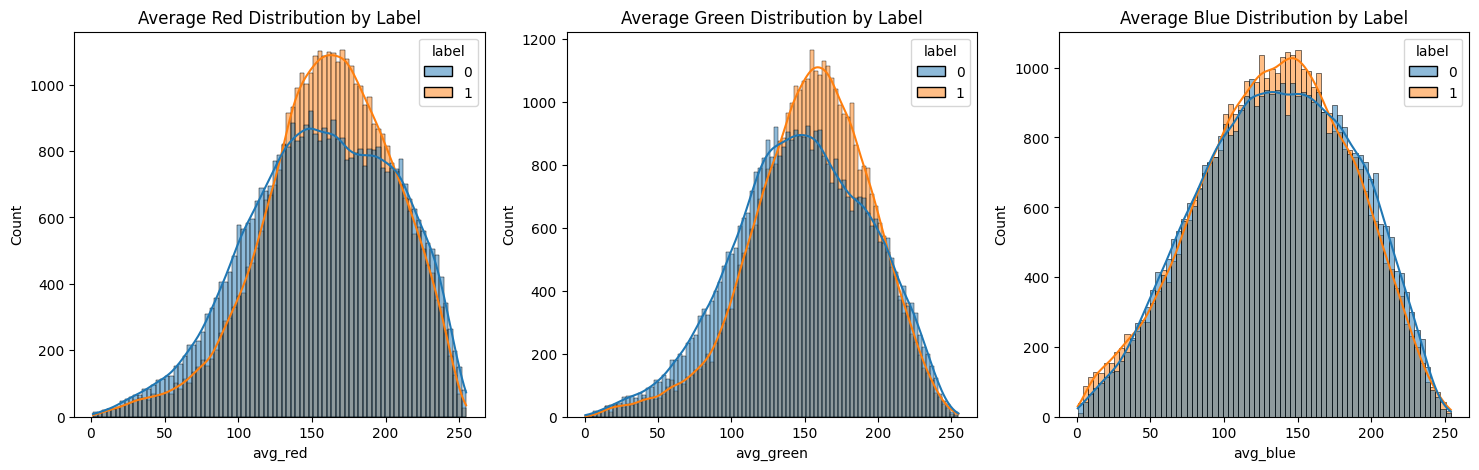

In [ ]:
from PIL import ImageStat

avg_red = []
avg_green = []
avg_blue = []

for idx, row in df_train.iterrows():
    img_path = row['file_name']
    file_path = os.path.join(path, row.file_name)

    try:
        with Image.open(file_path) as img:
            img = img.convert("RGB")
            stat = ImageStat.Stat(img)
            r, g, b = stat.mean  # average per channel
            avg_red.append(r)
            avg_green.append(g)
            avg_blue.append(b)
    except Exception as e:
        print(f"Error opening image {file_path}: {e}")
        avg_red.append(None)
        avg_green.append(None)
        avg_blue.append(None)

df_train['avg_red'] = avg_red
df_train['avg_green'] = avg_green
df_train['avg_blue'] = avg_blue

fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(data=df_train, x='avg_red', hue='label', kde=True, ax=axes[0])
axes[0].set_title("Average Red Distribution by Label")

sns.histplot(data=df_train, x='avg_green', hue='label', kde=True, ax=axes[1])
axes[1].set_title("Average Green Distribution by Label")

sns.histplot(data=df_train, x='avg_blue', hue='label', kde=True, ax=axes[2])
axes[2].set_title("Average Blue Distribution by Label")
plt.show()

In [ ]:
numeric_cols = ['width', 'height', 'aspect_ratio', 'avg_red', 'avg_green', 'avg_blue']
corr = df_train[numeric_cols + ['label']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()